# Логистическая регрессия на TensorFlow

In [397]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [398]:
iris = pd.read_csv('iris.csv')

In [399]:
iris.shape

(150, 5)

In [400]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [401]:
iris = iris[iris["species"].isin(["setosa","versicolor"])]

In [402]:
iris.shape

(100, 5)

In [403]:
iris.species = iris.species.replace(to_replace=['setosa', 'versicolor'], value=[0, 1])

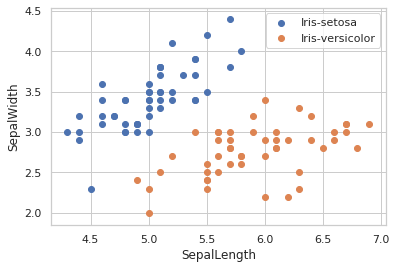

In [404]:
plt.scatter(iris[:50].sepal_length, iris[:50].sepal_width, label='Iris-setosa')
plt.scatter(iris[51:].sepal_length, iris[51:].sepal_width, label='Iris-versicolor')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best');

In [405]:
X = iris.drop(labels=['species'], axis=1).values
y = iris['species'].values

In [406]:
X.shape, y.shape

((100, 4), (100,))

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [408]:
X_train = MinMaxScaler().fit_transform(X_train)

In [409]:
X_test = MinMaxScaler().fit_transform(X_test)

In [445]:
A = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

In [446]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [447]:
# Declare the model
model = tf.matmul(data, A) + b

In [448]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=target))

In [449]:
# Define the learning rate， batch_size etc.
learning_rate = 0.01
batch_size = 30
iter_num = 1300

In [450]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [451]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(model))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [452]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [453]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    _ = sess.run(optimizer, feed_dict={data: batch_train_X, target: batch_train_y})
    loss_value = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    loss_trace.append(loss_value)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, loss_value,
                                                                          temp_train_acc, temp_test_acc))

epoch:  100 loss: 0.658988 train_acc: 0.671429 test_acc: 0.833333
epoch:  200 loss: 0.615242 train_acc: 0.714286 test_acc: 0.966667
epoch:  300 loss: 0.540201 train_acc: 0.757143 test_acc: 0.966667
epoch:  400 loss: 0.523843 train_acc: 0.828571 test_acc: 1.000000
epoch:  500 loss: 0.527250 train_acc: 0.871429 test_acc: 1.000000
epoch:  600 loss: 0.475939 train_acc: 0.985714 test_acc: 1.000000
epoch:  700 loss: 0.441004 train_acc: 0.985714 test_acc: 1.000000
epoch:  800 loss: 0.396779 train_acc: 0.985714 test_acc: 1.000000
epoch:  900 loss: 0.376672 train_acc: 0.985714 test_acc: 1.000000
epoch: 1000 loss: 0.362649 train_acc: 1.000000 test_acc: 1.000000
epoch: 1100 loss: 0.325501 train_acc: 1.000000 test_acc: 1.000000
epoch: 1200 loss: 0.317071 train_acc: 1.000000 test_acc: 1.000000
epoch: 1300 loss: 0.330695 train_acc: 1.000000 test_acc: 1.000000


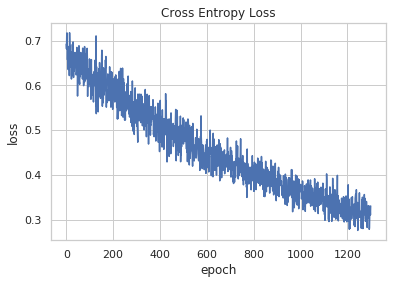

In [454]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

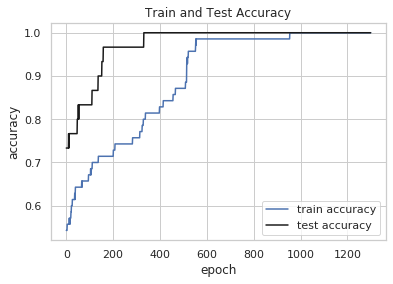

In [455]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [456]:
sess.run(A)

array([[-0.03537481],
       [-1.8472233 ],
       [ 3.150763  ],
       [-0.73572147]], dtype=float32)

In [457]:
sess.run(b)

array([[-0.05459146]], dtype=float32)

In [458]:
sess.run(tf.round(tf.sigmoid(model)), feed_dict = {data: X_test[:]})

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [459]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0])

In [460]:
sess.run(correct, feed_dict = {data: X_test, target: np.matrix(y_test).T})

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)